<a href="https://colab.research.google.com/github/1zpzz/QM2-Website-/blob/main/QM2_Hypothesis_Testing_Gun_Laws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
file_path = '/content/Public v3 (2).csv'
try:
    data = pd.read_csv(file_path, encoding='latin-1', delimiter=',', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    print("Error likely on line 12. Check the file for extra delimiters or inconsistencies.")

In [ ]:
cleaned_data = data[['State', 'Year']].dropna(subset=['State', 'Year'])
state_incident_counts = cleaned_data.groupby('State').size().reset_index(name='incident_count')

output_path = 'school_shooting_incidents_per_state.csv'
state_incident_counts.to_csv(output_path, index=False)

print(state_incident_counts)
cleaned_data = data[['State', 'Year']].dropna(subset=['State', 'Year'])
state_incident_counts = cleaned_data.groupby('State').size().reset_index(name='incident_count')

output_path = 'school_shooting_incidents_per_state.csv'
state_incident_counts.to_csv(output_path, index=False)
print(state_incident_counts)

   State  incident_count
0     AK               7
1     AL              76
2     AR              36
3     AZ              31
4     CA             276
5     CO              44
6     CT              28
7     DC              55
8     DE              21
9     FL             158
10    GA             112
11    HI               6
12    IA              23
13    ID              11
14    IL             152
15    IN              62
16    KS              27
17    KY              37
18    LA              84
19    MA              29
20    MD              99
21    ME               7
22    MI             119
23    MN              33
24    MO              64
25    MS              36
26    MT              11
27    NC             108
28    ND               3
29    NE              16
30    NH               8
31    NJ              32
32    NM              29
33    NV              25
34    NY             116
35    OH             142
36    OK              30
37    OR              37
38    PA             124


In [ ]:
file_path_2 = '/content/Gun_Law - Law Adoption Comparison as of 2021.csv'

Group 1: n=33, mean=56.515, std=56.236
Group 2: n=17, mean=60.765, std=66.881
The t-statistic is -0.224
Critical Value: 1.677
Fail to Reject H₀: The law 'No Guns in K12 Schools' does not significantly affect school shooting rates.


<ipython-input-7-97d8eb209666>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


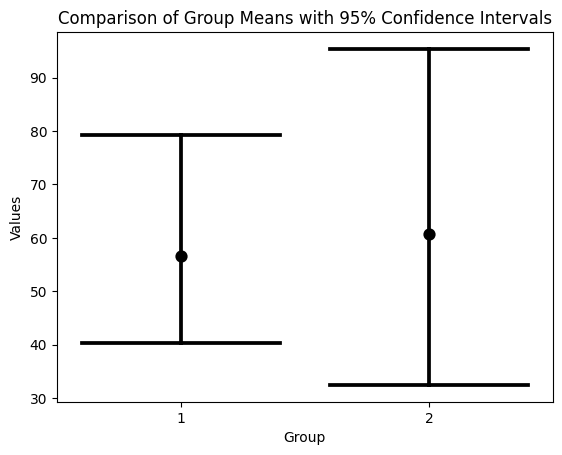

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the manual_ttest function
def manual_ttest(group1, group2, plot=False):
    # Get descriptive statistics
    desc1, desc2 = group1.describe(), group2.describe()

    n1, std1, mean1 = desc1['count'], desc1['std'], desc1['mean']
    n2, std2, mean2 = desc2['count'], desc2['std'], desc2['mean']

    # Calculate standard errors
    se1, se2 = std1**2 / n1, std2**2 / n2
    sed = np.sqrt(se1 + se2)  # Standard error of the difference

    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / sed

    # Print the results
    print(f"Group 1: n={n1:.0f}, mean={mean1:.3f}, std={std1:.3f}")
    print(f"Group 2: n={n2:.0f}, mean={mean2:.3f}, std={std2:.3f}")
    print(f"The t-statistic is {t_stat:.3f}")

    if plot:
        groups = pd.DataFrame()
        i = 1
        for group in [group1, group2]:
            plot_df = pd.DataFrame({'Values': group, 'Group': i})
            groups = pd.concat([groups, plot_df], ignore_index=True)
            i += 1
        sns.pointplot(
            data=groups, x='Group', y='Values',
            errorbar=('ci', 95), color='black', join=False, capsize=.8
        )
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

    return t_stat

# Load the shooting and law data
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = "/content/Gun_Law - Law Adoption Comparison as of 2021.csv"

shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'No Guns in K12 Schools'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Call the manual_ttest function
t_stat = manual_ttest(adopted_group, not_adopted_group, plot=True)

alpha = 0.05
df = len(adopted_group) + len(not_adopted_group) - 2  # Degrees of freedom
critical_value = np.abs(t.ppf(alpha, df))  # Critical value for one-tailed test # Now 't' is defined and accessible

print(f"Critical Value: {critical_value:.3f}")
if t_stat > critical_value:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Group 1: n=44, mean=58.636, std=59.815
Group 2: n=6, mean=53.000, std=61.573
The t-statistic is 0.211
Critical Value: 1.677
Fail to Reject H₀: The law 'Mental Health record reporting' does not significantly affect school shooting rates.


<ipython-input-8-eb9debf64477>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


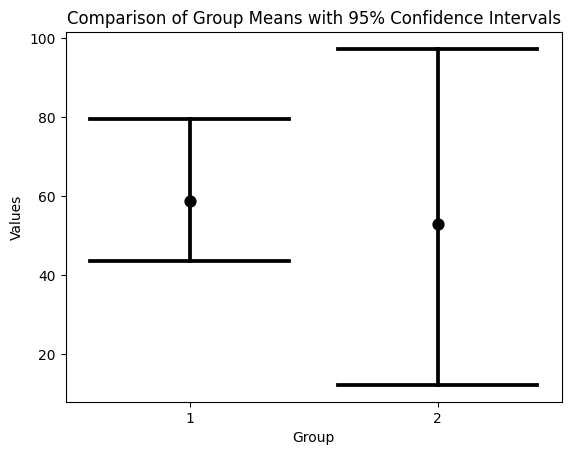

In [ ]:
# Define the manual_ttest function
def manual_ttest(group1, group2, plot=False):
    # Get descriptive statistics
    desc1, desc2 = group1.describe(), group2.describe()

    n1, std1, mean1 = desc1['count'], desc1['std'], desc1['mean']
    n2, std2, mean2 = desc2['count'], desc2['std'], desc2['mean']

    # Calculate standard errors
    se1, se2 = std1**2 / n1, std2**2 / n2
    sed = np.sqrt(se1 + se2)  # Standard error of the difference

    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / sed

    # Print the results
    print(f"Group 1: n={n1:.0f}, mean={mean1:.3f}, std={std1:.3f}")
    print(f"Group 2: n={n2:.0f}, mean={mean2:.3f}, std={std2:.3f}")
    print(f"The t-statistic is {t_stat:.3f}")

    # Optional plot
    if plot:
        groups = pd.DataFrame()
        i = 1
        for group in [group1, group2]:
            plot_df = pd.DataFrame({'Values': group, 'Group': i})
            # Use pd.concat instead of append
            groups = pd.concat([groups, plot_df], ignore_index=True)
            i += 1
        sns.pointplot(
            data=groups, x='Group', y='Values',
            errorbar=('ci', 95), color='black', join=False, capsize=.8
        )
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

    return t_stat

# Load the shooting and law data
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = "/content/Gun_Law - Law Adoption Comparison as of 2021.csv"

shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Mental Health record reporting'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Call the manual_ttest function
t_stat = manual_ttest(adopted_group, not_adopted_group, plot=True)

# Decision-making based on the t-statistic

# Decision-making based on the t-statistic
alpha = 0.05
df = len(adopted_group) + len(not_adopted_group) - 2  # Degrees of freedom
critical_value = np.abs(t.ppf(alpha, df))  # Critical value for one-tailed test # Now 't' is defined and accessible

print(f"Critical Value: {critical_value:.3f}")
if t_stat > critical_value:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Group 1: n=22, mean=68.545, std=68.259
Group 2: n=28, mean=49.643, std=51.180
The t-statistic is 1.082
Critical Value: 1.677
Fail to Reject H₀: The law 'Min age to purchase' does not significantly affect school shooting rates.


<ipython-input-9-9f9adf469eb3>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


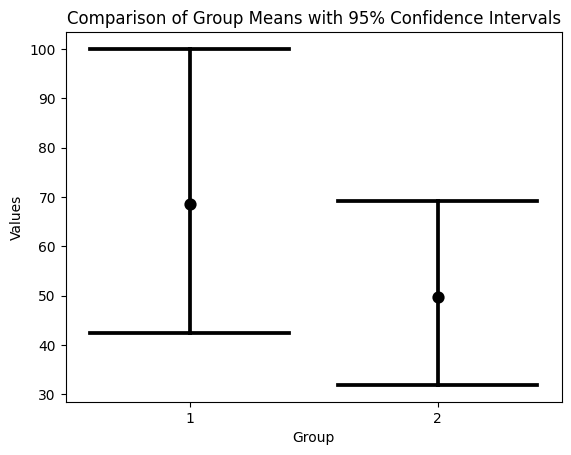

In [ ]:
# Define the manual_ttest function
def manual_ttest(group1, group2, plot=False):
    # Get descriptive statistics
    desc1, desc2 = group1.describe(), group2.describe()

    n1, std1, mean1 = desc1['count'], desc1['std'], desc1['mean']
    n2, std2, mean2 = desc2['count'], desc2['std'], desc2['mean']

    # Calculate standard errors
    se1, se2 = std1**2 / n1, std2**2 / n2
    sed = np.sqrt(se1 + se2)  # Standard error of the difference

    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / sed

    # Print the results
    print(f"Group 1: n={n1:.0f}, mean={mean1:.3f}, std={std1:.3f}")
    print(f"Group 2: n={n2:.0f}, mean={mean2:.3f}, std={std2:.3f}")
    print(f"The t-statistic is {t_stat:.3f}")

    if plot:
        groups = pd.DataFrame()
        i = 1
        for group in [group1, group2]:
            plot_df = pd.DataFrame({'Values': group, 'Group': i})
            groups = pd.concat([groups, plot_df], ignore_index=True)
            i += 1
        sns.pointplot(
            data=groups, x='Group', y='Values',
            errorbar=('ci', 95), color='black', join=False, capsize=.8
        )
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

    return t_stat

# Load the shooting and law data
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = "/content/Gun_Law - Law Adoption Comparison as of 2021.csv"

shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Min age to purchase'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Call the manual_ttest function
t_stat = manual_ttest(adopted_group, not_adopted_group, plot=True)

alpha = 0.05
df = len(adopted_group) + len(not_adopted_group) - 2  # Degrees of freedom
critical_value = np.abs(t.ppf(alpha, df))  # Critical value for one-tailed test # Now 't' is defined and accessible

print(f"Critical Value: {critical_value:.3f}")
if t_stat > critical_value:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")

Group 1: n=29, mean=63.793, std=61.891
Group 2: n=21, mean=49.905, std=56.288
The t-statistic is 0.826
Critical Value: 1.677
Fail to Reject H₀: The law 'Mental Health Prohibitor' does not significantly affect school shooting rates.


<ipython-input-10-0df946c67430>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


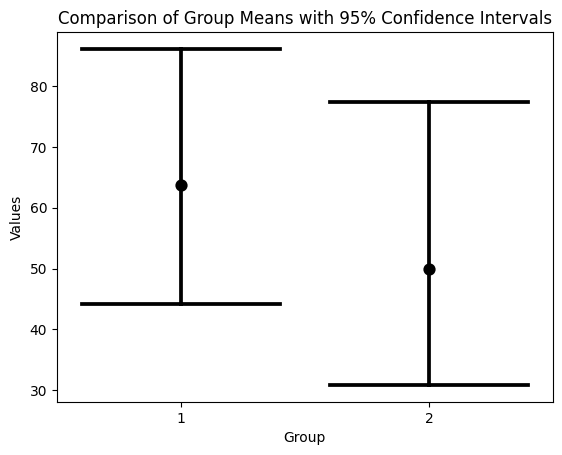

In [ ]:
def manual_ttest(group1, group2, plot=False):
    # Get descriptive statistics
    desc1, desc2 = group1.describe(), group2.describe()

    n1, std1, mean1 = desc1['count'], desc1['std'], desc1['mean']
    n2, std2, mean2 = desc2['count'], desc2['std'], desc2['mean']

    # Calculate standard errors
    se1, se2 = std1**2 / n1, std2**2 / n2
    sed = np.sqrt(se1 + se2)  # Standard error of the difference

    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / sed

    # Print the results
    print(f"Group 1: n={n1:.0f}, mean={mean1:.3f}, std={std1:.3f}")
    print(f"Group 2: n={n2:.0f}, mean={mean2:.3f}, std={std2:.3f}")
    print(f"The t-statistic is {t_stat:.3f}")

    if plot:
        groups = pd.DataFrame()
        i = 1
        for group in [group1, group2]:
            plot_df = pd.DataFrame({'Values': group, 'Group': i})
            groups = pd.concat([groups, plot_df], ignore_index=True)
            i += 1
        sns.pointplot(
            data=groups, x='Group', y='Values',
            errorbar=('ci', 95), color='black', join=False, capsize=.8
        )
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

    return t_stat

# Load the shooting and law data
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = "/content/Gun_Law - Law Adoption Comparison as of 2021.csv"

shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Mental Health Prohibitor'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Call the manual_ttest function
t_stat = manual_ttest(adopted_group, not_adopted_group, plot=True)
alpha = 0.05
df = len(adopted_group) + len(not_adopted_group) - 2  # Degrees of freedom
critical_value = np.abs(t.ppf(alpha, df))  # Critical value for one-tailed test # Now 't' is defined and accessible

print(f"Critical Value: {critical_value:.3f}")
if t_stat > critical_value:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")

Group 1: n=9, mean=104.333, std=68.842
Group 2: n=41, mean=47.780, std=52.786
The t-statistic is 2.319
Critical Value: 1.677
Reject H₀: The law 'School Threat Assessment team' significantly reduces school shooting rates.


<ipython-input-11-eec5b26b36be>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


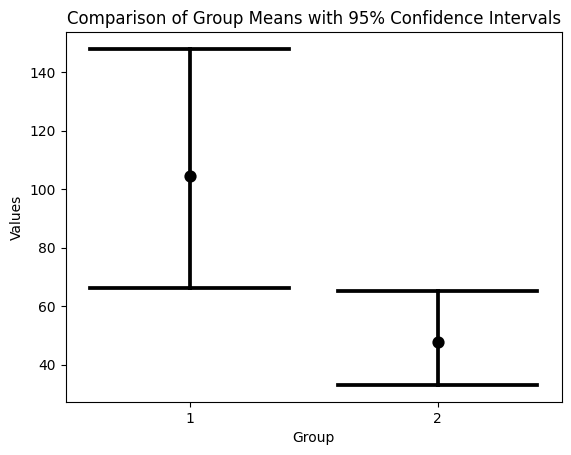

In [ ]:
# Define the manual_ttest function
def manual_ttest(group1, group2, plot=False):
    # Get descriptive statistics
    desc1, desc2 = group1.describe(), group2.describe()

    n1, std1, mean1 = desc1['count'], desc1['std'], desc1['mean']
    n2, std2, mean2 = desc2['count'], desc2['std'], desc2['mean']

    # Calculate standard errors
    se1, se2 = std1**2 / n1, std2**2 / n2
    sed = np.sqrt(se1 + se2)  # Standard error of the difference

    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / sed

    # Print the results
    print(f"Group 1: n={n1:.0f}, mean={mean1:.3f}, std={std1:.3f}")
    print(f"Group 2: n={n2:.0f}, mean={mean2:.3f}, std={std2:.3f}")
    print(f"The t-statistic is {t_stat:.3f}")

    # Optional plot
    if plot:
        groups = pd.DataFrame()
        i = 1
        for group in [group1, group2]:
            plot_df = pd.DataFrame({'Values': group, 'Group': i})
            # Use pd.concat instead of append
            groups = pd.concat([groups, plot_df], ignore_index=True)
            i += 1
        sns.pointplot(
            data=groups, x='Group', y='Values',
            errorbar=('ci', 95), color='black', join=False, capsize=.8
        )
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

    return t_stat

# Load the shooting and law data
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = "/content/Gun_Law - Law Adoption Comparison as of 2021.csv"

shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'School Threat Assessment team'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Call the manual_ttest function
t_stat = manual_ttest(adopted_group, not_adopted_group, plot=True)

# Decision-making based on the t-statistic

# Decision-making based on the t-statistic
alpha = 0.05
df = len(adopted_group) + len(not_adopted_group) - 2  # Degrees of freedom
critical_value = np.abs(t.ppf(alpha, df))  # Critical value for one-tailed test # Now 't' is defined and accessible

print(f"Critical Value: {critical_value:.3f}")
if t_stat > critical_value:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")


Group 1: n=26, mean=68.538, std=71.351
Group 2: n=24, mean=46.500, std=41.513
The t-statistic is 1.347


<ipython-input-13-dea98c17995d>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


Critical Value: 1.677
Fail to Reject H₀: The law 'Secure Storage or Child access prevention required' does not significantly affect school shooting rates.


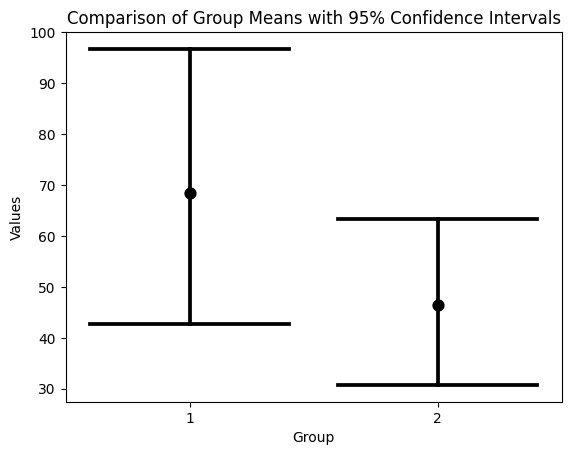

In [ ]:
# Define the manual_ttest function
def manual_ttest(group1, group2, plot=False):
    # Get descriptive statistics
    desc1, desc2 = group1.describe(), group2.describe()

    n1, std1, mean1 = desc1['count'], desc1['std'], desc1['mean']
    n2, std2, mean2 = desc2['count'], desc2['std'], desc2['mean']

    # Calculate standard errors
    se1, se2 = std1**2 / n1, std2**2 / n2
    sed = np.sqrt(se1 + se2)  # Standard error of the difference

    # Calculate the t-statistic
    t_stat = (mean1 - mean2) / sed

    # Print the results
    print(f"Group 1: n={n1:.0f}, mean={mean1:.3f}, std={std1:.3f}")
    print(f"Group 2: n={n2:.0f}, mean={mean2:.3f}, std={std2:.3f}")
    print(f"The t-statistic is {t_stat:.3f}")

    # Optional plot
    if plot:
        groups = pd.DataFrame()
        i = 1
        for group in [group1, group2]:
            plot_df = pd.DataFrame({'Values': group, 'Group': i})
            # Use pd.concat instead of append
            groups = pd.concat([groups, plot_df], ignore_index=True)
            i += 1
        sns.pointplot(
            data=groups, x='Group', y='Values',
            errorbar=('ci', 95), color='black', join=False, capsize=.8
        )
        plt.title('Comparison of Group Means with 95% Confidence Intervals')

    return t_stat

# Load the shooting and law data
shooting_data_file = "school_shooting_incidents_per_state.csv"
law_data_file = "/content/Gun_Law - Law Adoption Comparison as of 2021.csv"

shooting_df = pd.read_csv(shooting_data_file)
law_df = pd.read_csv(law_data_file)

# Merge the dataframes (assuming 'State' is the common column)
merged_df = pd.merge(shooting_df, law_df, on='State')

# Specify the law to test
law_to_test = 'Secure Storage or Child access prevention required'  # Replace with the column name of the law

# Separate the data into two groups: adopted (1) and not adopted (0)
adopted_group = merged_df[merged_df[law_to_test] == 1]['incident_count']
not_adopted_group = merged_df[merged_df[law_to_test] == 0]['incident_count']

# Call the manual_ttest function
t_stat = manual_ttest(adopted_group, not_adopted_group, plot=True)

# Decision-making based on the t-statistic

# Decision-making based on the t-statistic
alpha = 0.05
df = len(adopted_group) + len(not_adopted_group) - 2  # Degrees of freedom
critical_value = np.abs(t.ppf(alpha, df))  # Critical value for one-tailed test # Now 't' is defined and accessible

print(f"Critical Value: {critical_value:.3f}")
if t_stat > critical_value:
    print(f"Reject H₀: The law '{law_to_test}' significantly reduces school shooting rates.")
else:
    print(f"Fail to Reject H₀: The law '{law_to_test}' does not significantly affect school shooting rates.")
